# 타이타닉 프로젝트 : 사망 예측

### 필요한 라이브러리 읽어오기
- numpy
- pandas
- matplotlib
- seaborn
- scikit-learn
- lightgbm

In [73]:
import pandas as pd
import numpy as np

In [74]:
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")
submission = pd.read_csv("./data/gender_submission.csv")

In [75]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### test_df 에서는 "Survived" 항목이 없는  것을 확인할 수 있다.

In [76]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [77]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


### 랜덤시드 설정
랜덤시드는 난수를 생성하기 위한 입력값으로, 고정된 값을 입력함으로써 고정된 난수를 사용할 수 있다.
비교적 적은 데이터를 사용하는 현재 프로젝트에서는 난수 값에 따라 결과가 크게 달라질 수 있기 때문에 난수를 고정해 둘 필요가 있다.

In [78]:
import random
np.random.seed(1234)
random.seed(0)

## 데이터 개요 파악
불러온 데이터를 다양한 관점으로 파악하는 연습을 한다.
이번 프로젝트의 접근방식을 __탐색적 데이터 해석(EDA)__ 이라고 한다.

### 데이터의 행과 열 확인
`데이터프레임명.shape`은 불러온 데이터의 행과 열 개수를 반환한다.

In [79]:
print(train_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


### 데이터 내용 미리보기
`데이터프레임명.head()`은 데이터의 맨 앞쪽 몇 행을 표시할 수 있다. 괄호 안에 숫자를 지정해서 몇 행을 출력할 지 정할 수 있다. 기본값은 5인 듯.

In [80]:
pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 50)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 데이터 속성 확인하기
`데이터프레임명.dtypes`명령으로 데이터 내 각 열 값의 속성을 조회할 수 있다.

In [81]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### 데이터의 통계량 확인하기
`데이터프레임명.describe()` 함수로 수치 데이터의 평균이나 분산 등 여러 가지 통계 정보를 파악할 수 있다.

In [82]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [83]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### 카테고리 변수 확인하기
`데이터프레임명["열명"]` 형태로 개별 열에서 언하는 데이터를 추출할 수 있다.
데이터프레임에서 특정 열을 뽑아낸 데이터를 __시리즈(series)__ 라고 한다.

`데이터프레임명["열명"].value_counts()`라는 코드로 지정된 열(series)에 포함된 값들과 중복횟수 등을 확인할 수 있다.

In [84]:
train_df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [85]:
train_df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [86]:
train_df["Cabin"].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

### 결측치 확인하기
`데이터프레임명.isnull()`을 사용하면 행과 열별로 결측치의 존재 여부를 판정할 수 있고, `데이터프레임명.sum()`으로 각 행의 값을 합칠 수도 있다.
`데이터프레임명.isnull().sum()`을 사용해서 각 변수(열)의 결측치 수를 확인할 수 있다.

In [87]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [88]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## 데이터의 시각화
시각화용 라이브러리로는 
- matplotlib
- seaborn
을 사용한다

In [89]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
plt.style.use("fivethirtyeight")

## 목적 변수 관련 데이터의 시각화
목적 변수인 "Survived"에 관한 데이터 시각화를 진행한다.
### 데이터프레임에서 임의의 열 추출하기
데이터프레임에서 임의의 열만 추출하려면 `데이터프레임명[["임의의 열"]]`이라고 명령하면 된다.
대괄호가 두개 있음에 주의!

In [91]:
train_df[["Embarked","Survived","PassengerId"]]


,Embarked,Survived,PassengerId
0,S,0,1
1,C,1,2
2,S,1,3
3,S,1,4
4,S,0,5
...,...,...,...
886,S,0,887
887,S,1,888
888,S,0,889
889,C,1,890


### 시각화하고 싶은 데이터에서 결측치 제외하기
`데이터프레임명.dropna()`를 실행하면 결측치를 포함한 행을 제거한다.

In [92]:
train_df[["Embarked","Survived","PassengerId"]].dropna()

,Embarked,Survived,PassengerId
0,S,0,1
1,C,1,2
2,S,1,3
3,S,1,4
4,S,0,5
...,...,...,...
886,S,0,887
887,S,1,888
888,S,0,889
889,C,1,890


## Embarked와 Survived로만 집계하기
집계는 `데이터프레임명.groupby(["집계하고 싶은 열명"]).집계 함수` 형태로 실행한다.
여기서는 Embarked, Survived별로 집계하고 싶기 때문에 그 변수들을 groupby 안에 작성한 후 count()로 실행한다.

In [93]:
train_df[["Embarked","Survived","PassengerId"]].dropna().groupby(["Embarked","Survived"]).count()

PassengerId
Embarked Survived             
C        0                  75
         1                  93
Q        0                  47
         1                  30
S        0                 427
         1                 217

### 데이터를 수평으로 변환하기
데이터를 정렬하는 방법에는 __수직정렬__과 __수평정렬__이 있다.
수직정렬은 위 output과 같이 Embarked, Survived, "PassengerId의 값이 세로로 나열되어 있는 것이다.
수평정렬은 특정 데이터를 가로로 정렬한다.
`unstack()`으로 수직 데이터를 수평 데이터 형태로 변환할 수 있다.

In [94]:
embarked_df = train_df[["Embarked","Survived","PassengerId"]].dropna().groupby(["Embarked","Survived"]).count().unstack()

embarked_df 

PassengerId     
Survived           0    1
Embarked                 
C                 75   93
Q                 47   30
S                427  217

### 누적 막대 그래프로 시각화하기
판다스의 데이터프레임을 그리려면 `데이터프레임명.plot.그래프종류`형태로 실행하면 된다.

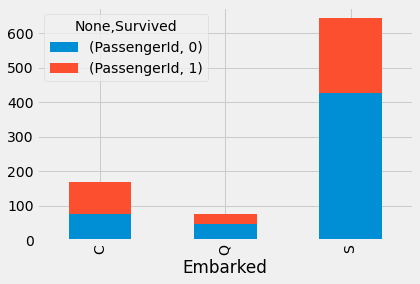

In [95]:
embarked_df.plot.bar(stacked=True)

승선항구가 C일때는 절반 정도 사망했지만 Q, S 일때는 절반 이상이 사망한 것으로 보인다.

-> 어쩌면 승선 항구에 따라 승객 유형이나 상태에 차이가 있었을 지도 모른다.

### 수치로 확인하기
위의 결과(승선 항구별 사망률)를 수치로 파악해보자. `데이터프레임명.iloc[행 번호, 열 번호]`로 임의의 행과 열을 추출할 수 있다. 번호를 정하지 않으면 모든 행, 열이 대상이 된다.
예를 들어 0번째 열의 모든 줄은 .iloc[:,0]이 된다. 0번째 열(사망 수)을 0번째 열 + 1번째 열(생존 수)의 합으로 나눈 후 이를 새롭게 survived_rate 변수로 만들면 된다.

In [96]:
embarked_df["survived_rate"] = embarked_df.iloc[:,1] / (embarked_df.iloc[:,1] + embarked_df.iloc[:,0])
embarked_df

PassengerId      survived_rate
Survived           0    1              
Embarked                               
C                 75   93      0.553571
Q                 47   30      0.389610
S                427  217      0.336957

### 성별과 티켓 등급 시각화하기
성별과 티켓등급별 사망률도 각각 확인해보자.

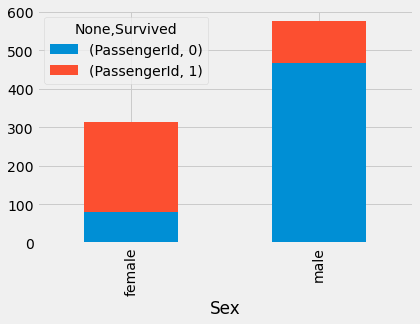

In [97]:
sex_df = train_df[["Sex", "Survived", "PassengerId"]].dropna().groupby(["Sex", "Survived"]).count().unstack()
sex_df.plot.bar(stacked=True)

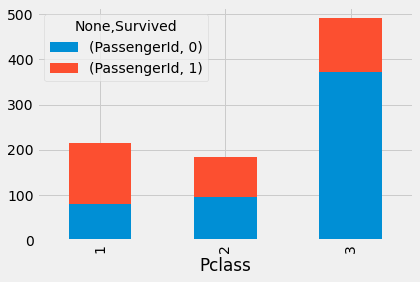

In [98]:
ticket_df = train_df[["Pclass", "Survived", "PassengerId"]].dropna().groupby(["Pclass", "Survived"]).count().unstack()
ticket_df.plot.bar(stacked=True)

확인 결과 여성이 남성보다 생존율이 높고, 티켓 등급이 높을수록(1등급) 생존율이 높았다.

### 연령별 생존율을 히스토그램으로 시각화하기
연령은 연속값이므로 _히스토그램_ 을 만들어 확인한다.
히스토그램을 그리려면 `데이터프레임명.hist()` 혹은 `plt.hist()`라고 실행해야 한다.
여러 히스토그램이 동시에 보이게 하려면 인수의 `histtype='barstacked'`로 지정한다.
그 외 인수로는 히스토그램 빈 개수를 나타내는 bins, 라벨을 지정하는 label 등이 있다. 라벨을 지정하면 `plt.legend()`를 써서 그래프 내부에 라벨을 표시할 수 있다.

인수 간에 순서는 상관 없어보인다. 

/Users/gello/.local/share/virtualenvs/Tytanic-0ZIX3wce/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/Users/gello/.local/share/virtualenvs/Tytanic-0ZIX3wce/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


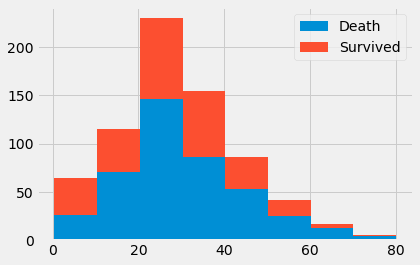

In [99]:
plt.hist(x=[train_df.Age[train_df.Survived==0], train_df.Age[train_df.Survived==1]], bins=8, histtype='barstacked', label=["Death", "Survived"])
plt.legend()

10세 이하의 아이들이 다른 연령층에 비해 생존율이 높았다.

## 카테고리 변수를 수치 데이터화 하기 (더미 변수화)
상관관계의 계산이나 머신러닝 등 처리는 수치데이터에서만 실행할 수 있다. 따라서 수치데이터가 아닌 변수들의 상관성을 분석하기 위해서는 먼저 수치데이터로 변환해주어야 한다.

카테고리 변수를 수치 데이터로 변환하려면 `원-핫 인코딩`을 사용해야 한다.
`원-핫 인코딩`이란 _어떤 카테고리 변수에 대하여 그 값인지 여부를 1, 0으로 나타내는 방법_ 이다. 이를 더미(dummy)변수화한다고도 한다.

`pd.get_dummies(데이터프레임명, columns=["변수화하고싶은 열명"])`을 수행하면 원-핫 인코딩으로 더미 변수화할 수 있다. 복수 열을 동시에 지정해 인코딩 할 수 있다.
이때 인수를 `drop_first=True`로 설정하면 첫번째 열을 제외할 수 있다. 이진화 될 경우에는 어차피 한쪽이 참인지만 보면 되므로 중복된 열을 제거하는 것이다. 시각화할 때는 상황에 따라 더 잘 이해되는 쪽으로 결정하자.

In [100]:
train_df_corr = pd.get_dummies(train_df, columns=["Sex"],drop_first=True)
train_df_corr = pd.get_dummies(train_df_corr, columns=["Embarked"])
train_df_corr.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,0,1


## 상관 행렬 작성하기
각 값의 상관행렬(상관계수를 나열하여 -1~1의 수치로 확인하는 것) 을 계산해보자. 
`데이터프레임명.corr()` 의 형태로 각 변수간 상관계수를 나타낸 행렬을 작성할 수 있다

In [101]:
train_corr = train_df_corr.corr()
train_corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.042939,-0.001205,-0.033606,0.022148
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.543351,0.168240,0.003650,-0.155660
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.131900,-0.243292,0.221009,0.081720
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.093254,0.036261,-0.022405,-0.032523
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.114631,-0.059528,-0.026354,0.070941
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.245489,-0.011069,-0.081228,0.063036
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182333,0.269335,-0.117216,-0.166603
Sex_male,0.042939,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,1.000000,-0.082853,-0.074115,0.125722
Embarked_C,-0.001205,0.168240,-0.243292,0.036261,-0.059528,-0.011069,0.269335,-0.082853,1.000000,-0.148258,-0.778359
Embarked_Q,-0.033606,0.003650,0.221009,-0.022405,-0.026354,-0.081228,-0.117216,-0.074115,-0.148258,1.000000,-0.496624


## 히트맵으로 시각화하기
시각화 라이브러리인 seaborn의 히트맵(heatmap) 기능을 이용하면 위에서 구한 상관행렬을 히트맵으로 그릴 수 있다.
인수 annot(annotation)을 True로 설정하면 상관행렬 중 상관계수가 각 칸에 숫자로 나타난다.

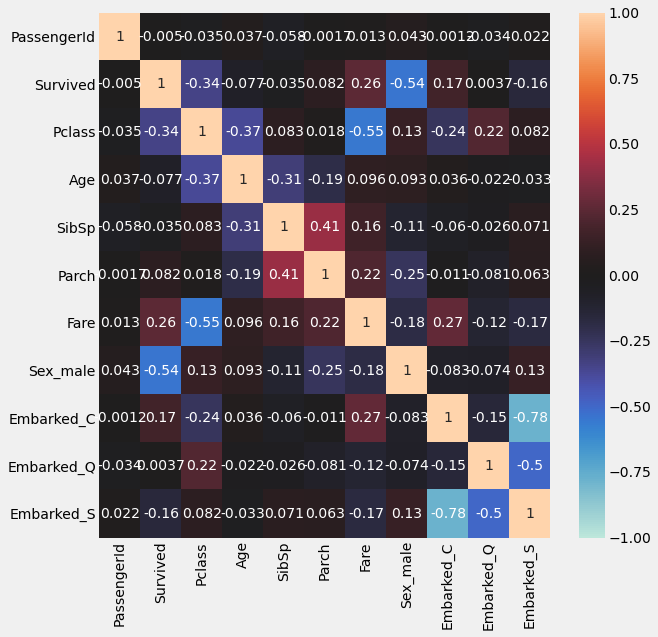

In [102]:
plt.figure(figsize=(9, 9)) # 그래프의 사이즈를 설정하는 함수. 단위는 inch이다. (이 경우 9 X 9 inch )
sns.heatmap(train_corr, vmax=1, vmin=-1, center=0, annot=True)

Survived와 가장 상관관계가 높은 것은 Sex_male로 -0.54이다. 
상관계수는 절댓값이 클 수록 상관관계가 높은 것으로, 두 변수 사이에서 한쪽이 증감함에 따라 다른쪽 값도 증감하는 경향이 있는지 나타낸다.
이어서 Pclass가 -0.34, Fare가 0.26의 상관관계를 나타냈다. 한편 앞서 시각화로 확인한 Age는 전체적으로 -0.077이므로 Survived와 상관 없는 것 같아 보인다. 물론 이것만으로 상관관계가 없다고 단정할 수는 없음. 단지 연령대와 사망률의 관계를 평균적으로 나타낼 뿐 연령대별로 사망률의 폭이 비례적으로 증가하지 않을 수도 있기 때문이다.

## 데이터 전처리와 특징 값 생성
데이터에는 변환 없이 그대로 머신 러닝에서 사용하기 어려운 형태가 포함되어있다. 또 일단 모델이 읽어들일 수는 있지만 더 좋은 형태로 변형시키는 편이 정확도가 좋아지는 것들도 있다. 거기에 결측치도 고려해야 하기 때문에 머신러닝 전에 데이터의 전처리과정이 필요하다.

### 전처리할 데이터
Fare(티켓 요금)
Name(성씨, 호칭, 이름)
Parch(승선중인 부모나 자녀의 수), SibSp(승선중인 형제나 배우자의 수)

### 학습 데이터와 테스트 데이터의 통합
전처리하기 전에 먼저 train set과 test set을 통합한 테이터를 생성한다. 이것은 train, test 양쪽 데이터를 모두 이용하여 전체 집계나 통계 정보를 얻기 위해서이다.

판다스의 데이터프레임을 결합하려면 `pd.concat([결합하고 싶은 데이터프레임 1, 결합하고 싶은 데이터프레임 2])` 을 실행한다.

In [103]:
all_df = pd.concat([train_df,test_df], sort=False).reset_index(drop=True)
all_df 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


`sort=True`로 하면 열을 알파벳순으로 새로 정렬하는데, 이번에는 기존 변수들의 순서를 바꾸지 않기 위해 False로 두었다.
`reset_index()`를 하면 index를 새로 매기고 `drop=True`로 하면 기존 index열을 삭제한다.

### 전체 데이터로 결측치 수 확인하기

In [104]:
all_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

## 결측치 메우기(Fare)
결측치를 확인한 결과, 테스트데이터 중 Fare값에 결측치가 하나 있었다. 이 값을 채우기 위해 Pclass별 Fare의 평균값으로 해당 결측치를 채우는 방법을 쓰겠다.

In [105]:
Fare_mean = all_df[["Pclass","Fare"]].groupby("Pclass").mean().reset_index()
Fare_mean.columns = ["Pclass","Fare_mean"] # 열 명 변경하기
Fare_mean

,Pclass,Fare_mean
0,1,87.508992
1,2,21.179196
2,3,13.302889


Fare_mean을 all_df와 Pclass로 연결한 후 Fare의 결측치를 isnull()로 판정한다. 만일 null이라면 Fare를 Fare_mean값으로 바꾼다.

여기에 loc이 사용되는데, 이것은 앞서 행 번호와 열 번호로 데이터 범위를 지정했던 iloc과 달리 `데이터프레임명.loc[행명, 열명]` 형태로 데이터 범위를 지정한다.

In [106]:
all_df = pd.merge(all_df, Fare_mean, on="Pclass", how="left")
all_df.loc[all_df["Fare"].isnull(),"Fare"] = all_df["Fare_mean"]
all_df = all_df.drop("Fare_mean", axis=1)

두번째 줄의 `all_df["Fare"].isnull()`은 행을 지정하고 `"Fare"`는 열을 지정하게 된다.
결측치를 메운 후 Fare_mean 값은 이제 불필요 하므로 삭제한다.

결측치가 한 종류뿐인 경우 `fillna(결측치를 메우고 싶은 값)` 형태로 직접 간단히 채울 수도 있지만, 위와 같은 방법으로 여러 결측치를 Pclass별 평균값으로 한번에 채워넣을 수도 있다.

### Name 호칭에 주목하기

In [107]:
all_df["Name"].head(5)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

호칭이 Master, Mr, Miss, Mrs등으로 나뉘고 이것은 일반적으로 연령이나 성별과 관계가 있다.

### 호칭을 변수로 추가하기


In [108]:
name_df = all_df["Name"].str.split("[,.]", 2, expand=True) # expand=True를 해야 split된 각 요소들이 각 열에 할당되어 데이터프레임화 된다.
name_df.columns = ["family_name","honorific","name"] # 각 열에 이름 지정
name_df

,family_name,honorific,name
0,Braund,Mr,Owen Harris
1,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss,Laina
3,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,Allen,Mr,William Henry
...,...,...,...
1304,Spector,Mr,Woolf
1305,Oliva y Ocana,Dona,Fermina
1306,Saether,Mr,Simon Sivertsen
1307,Ware,Mr,Frederick


혹시 split 된 값들 중 공백문자가 들어간 값이 있을 수 있으므로 각 열마다 strip()을 사용해 선두와 말미의 공백문자를 삭제해준다.

In [109]:
name_df["family_name"] = name_df["family_name"].str.strip()
name_df["honorific"] = name_df["honorific"].str.strip()
name_df["name"] = name_df["name"].str.strip()

### 호칭마다 인원수 세기

In [110]:
name_df["honorific"].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: honorific, dtype: int64

### 호칭별 연령 분포 확인하기
먼저 all_df와 name_df를 결합한다. 이전과 마찬가지로 `pd.concat()`을 사용하는데, 여기서는 세로가 아니라 가로로 결합해야 한다. `axis=1`로 설정하면 두 데이터프레임이 가로로 결합한다.

In [111]:
all_df = pd.concat([all_df,name_df], axis=1)
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_name,honorific,name
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Spector,Mr,Woolf
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Oliva y Ocana,Dona,Fermina
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Saether,Mr,Simon Sivertsen
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Ware,Mr,Frederick


박스 플롯을 이용하여 all_df의 _호칭별 연령 분포_ 를 확인해보자.

박스 플롯은 `sns.boxplot(x="x축으로 하고 싶은 값", y="y축으로 하고 싶은 값", data=시각화에 이용하는 데이터)` 형태로 작성한다.

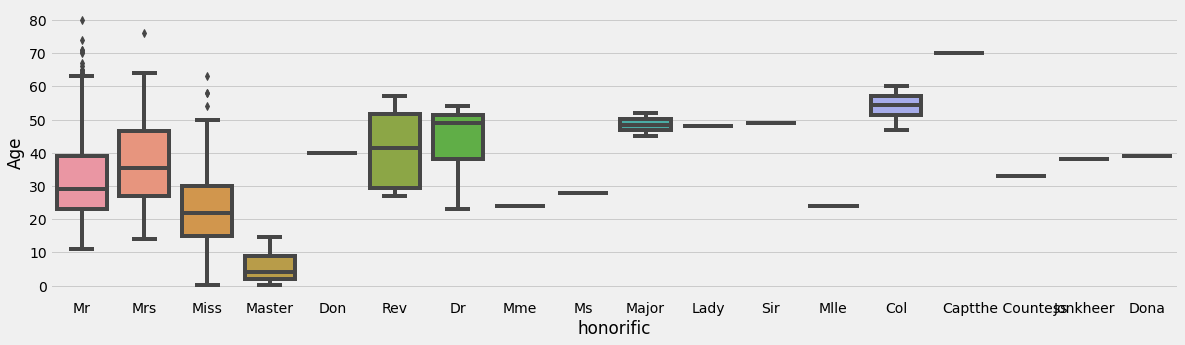

In [112]:
plt.figure(figsize=(18, 5))
sns.boxplot(x="honorific", y="Age", data=all_df)

### 호칭별 연령 평균값 확인하기

In [113]:
all_df[["Age", "honorific"]].groupby("honorific").mean()

,Age
honorific,
Capt,70.000000
Col,54.000000
Don,40.000000
Dona,39.000000
Dr,43.571429
Jonkheer,38.000000
Lady,48.000000
Major,48.500000
Master,5.482642


### 호칭별 생존율 차이 확인하기
호칭에 따라 평균 연령에 차이가 있었다. 그럼 호칭에 따라 생존율에도 차이가 있을까?

우선 원래 데이터프레임에 이름을 각각 따로 구분해놓은 데이터프레임을 결합한다.

In [114]:
train_df = pd.concat([train_df,name_df[0:len(train_df)].reset_index(drop=True)], axis=1)
test_df = pd.concat([test_df,name_df[len(train_df):].reset_index(drop=True)], axis=1)

In [115]:
honorific_df = train_df[["honorific", "Survived", "PassengerId"]].dropna().groupby(["honorific","Survived"]).count().unstack()
# honorific_df.plot.bar(stacked=True)
honorific_df

PassengerId       
Survived               0      1
honorific                      
Capt                 1.0    NaN
Col                  1.0    1.0
Don                  1.0    NaN
Dr                   4.0    3.0
Jonkheer             1.0    NaN
Lady                 NaN    1.0
Major                1.0    1.0
Master              17.0   23.0
Miss                55.0  127.0
Mlle                 NaN    2.0
Mme                  NaN    1.0
Mr                 436.0   81.0
Mrs                 26.0   99.0
Ms                   NaN    1.0
Rev                  6.0    NaN
Sir                  NaN    1.0
the Countess         NaN    1.0

여성에게 사용되는 Miss나 Mrs는 생존율이 높은 반면 남성에게 사용되는 Mr는 사망률이 높은 것으로 나타났다. 또 남성 중에서도 젊은 남성에게 사용되는 Master는 Mr와 비교할 때 생존율이 높다. 앞서 서술한 연령, 성별 생존율과 같은 경향을 띰. 연령은 결측치가 많은 데이터이므로 여기서 구한 호칭 데이터가 연령을 보완하는 효과적인 변수가 될 가능성이 있다.

### 연령의 결측치를 호칭별 평균 연령으로 보완하기
이제 원래 데이터에 호칭별 평균 연령을 추가하고, 그 후에 연령이 결손된 곳을 호칭의 평균 연령으로 보충하자. 

보충 후 honorific_Age는 불필요하므로 삭제.

In [116]:
honorific_age_mean = all_df[["honorific","Age"]].groupby("honorific").mean().reset_index()
honorific_age_mean.columns = ["honorific","honorific_Age"]
all_df = pd.merge(all_df, honorific_age_mean, on="honorific", how="left")
all_df.loc[all_df["Age"].isnull(),"Age"] = all_df["honorific_Age"]
all_df = all_df.drop(["honorific_Age"], axis=1)

### 가족 인원수 추가하기

In [117]:
all_df["family_num"] = all_df["Parch"] + all_df["SibSp"]
all_df["family_num"].value_counts()

0     790
1     235
2     159
3      43
5      25
4      22
6      16
10     11
7       8
Name: family_num, dtype: int64

### 홀로 승선했는지 여부를 새로운 변수로 추가하기
조난상황시 가족이 함께 행동했을 가능성이 있으므로 1명인지 같은 승선가족이 있는지가 생존에 영향을 줄 수 있다.

alone이란 변수를 추가해 1명인 경우 1, 여러명인 경우 0을 입력

In [118]:
all_df.loc[all_df["family_num"]==0,"alone"] = 1
all_df["alone"].fillna(0, inplace=True)

### 불필요한 변수 삭제
지금까지 여러 변수를 만들어 추가해왔다. 이제 불필요한 변수를 삭제하여 보자.

- 먼저 PassengerId는 단순히 승객의 ID이므로 예측에 불필요하다.

- Name은 이전에 분할하여 병합했으니 불필요하다.

- family_name과 name은 분석에 사용하기에는 데이터수에 비해 가족수가 많고 혼자 가는 승객도 많아 가족단위 분석이 어려우므로 이번 프로젝트에서는 뺀다.

- Ticket도 생존 규칙성을 찾기 어려우므로 제거한다.

- Cabin은 결손이 많아서 제거한다.

In [119]:
all_df = all_df.drop(["PassengerId","Name","family_name","name","Ticket","Cabin"], axis=1)
all_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,1,0.0
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,1,0.0
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,0,1.0
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,1,0.0
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,0,1.0


### 카테고리 변수를 수치로 변환하기
여러 카테고리 변수중 문자열은 수치로 변환한다. 우선은 변수 형태가 object인 것을 카테고리 변수로 관리한다.

In [120]:
categories = all_df.columns[all_df.dtypes=="object"]
print(categories)

Index(['Sex', 'Embarked', 'honorific'], dtype='object')


### Mr, Miss, Mrs, Master 이외는 other로 통합하기
앞서 보았듯이 호칭은 Mr, Miss, Mrs, Master 외에는 수가 적다. 따라서 학습이 잘 안 될 수 있으므로 Mr, Miss, Mrs, Master 이외의 호칭은 other로 통합하자.

In [121]:
all_df.loc[~((all_df["honorific"]=="Mr")|(all_df["honorific"]=="Miss")|(all_df["honorific"]=="Mrs")|(all_df["honorific"]=="Master")),"honorific"] = "other"

all_df.honorific.value_counts()

Mr        757
Miss      260
Mrs       197
Master     61
other      34
Name: honorific, dtype: int64

### 문자열을 수치로 변환하기: 라벨 인코딩
문자열을 수치로 변환할 때 앞에서 사용한 원-핫 인코딩 방법 외에 라벨 인코딩(label encoding) 기법을 사용할 수 있다. 이것은 _각 카테고리명을 임의의 숫자로 대체하는 방법_ 이다. 라벨 인코딩의 장점은 변수의 수는 그대로 유지하면서 카테고리변수를 수치화할 수 있다는 점이다.

파이썬에서 라벨 인코딩 하려면 sklearn에서 LabelEncoder를 가져와야 한다.

In [122]:
from sklearn.preprocessing import LabelEncoder

LabelEncoder는 결측치가 있으면 작동하지 않으므로 Embarked에 포함된 결측치는 missing 등 임의의 문자열로 미리 치환해야 한다.

In [123]:
all_df["Embarked"].fillna("missing", inplace=True)

all_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,1,0.0
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,1,0.0
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,0,1.0
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,1,0.0
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,0,1.0


In [124]:
le = LabelEncoder()
le = le.fit(all_df["Sex"])
all_df["Sex"] = le.transform(all_df["Sex"])

In [125]:
for cat in categories:
    le = LabelEncoder()
    print(cat)
    if all_df[cat].dtypes == "object":
        le = le.fit(all_df[cat])
        all_df[cat] = le.transform(all_df[cat])

Sex
Embarked
honorific


In [126]:
all_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,0.0,3,1,22.0,1,0,7.2500,2,2,1,0.0
1,1.0,1,0,38.0,1,0,71.2833,0,3,1,0.0
2,1.0,3,0,26.0,0,0,7.9250,2,1,0,1.0
3,1.0,1,0,35.0,1,0,53.1000,2,3,1,0.0
4,0.0,3,1,35.0,0,0,8.0500,2,2,0,1.0


### 모든 데이터를 학습 데이터와 테스트 데이터로 되돌리기
이제 모든 열을 수치 데이터로 만들었다. 마지막으로 모든 데이터를 다시 학습 데이터와 테스트 데이터로 되돌려 놓아야 한다.

_Survived 값이 null이 아닐 때는 학습 데이터로 하고, null일 때는 테스트 데이터로 한다._ 

Survived 이외의 변수를 설명 변수(train_X, test_X)로 하고, Survived 값을 목적 변수(train_Y)로 하자.

In [150]:
train_X = all_df[all_df["Survived"].notnull()].drop(["Survived"], axis=1).reset_index(drop=True)
train_Y = train_df["Survived"]

test_X = all_df[all_df["Survived"].isnull()].drop(["Survived"], axis=1).reset_index(drop=True)
test_X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,3,1,34.500000,0,0,7.8292,1,2,0,1.0
1,3,0,47.000000,1,0,7.0000,2,3,1,0.0
2,2,1,62.000000,0,0,9.6875,1,2,0,1.0
3,3,1,27.000000,0,0,8.6625,2,2,0,1.0
4,3,0,22.000000,1,1,12.2875,2,3,2,0.0
...,...,...,...,...,...,...,...,...,...,...
413,3,1,32.252151,0,0,8.0500,2,2,0,1.0
414,1,0,39.000000,0,0,108.9000,0,4,0,1.0
415,3,1,38.500000,0,0,7.2500,2,2,0,1.0
416,3,1,32.252151,0,0,8.0500,2,2,0,1.0


## 머신 러닝 모델링

여기서는 캐글 경진대회에서 자주 사용하는 LightGBM 머신러닝 기법을 사용한다.
[[LightGBM]]



In [128]:
import lightgbm as lgb

### 과적합과 과소적합
학습데이터를 과하게 학습해서 오히려 미지의 데이터에 대해서 정확하게 예측하지 못하게 되는 것을 과적합(Overfitting), 학습이 불충분하게 진행되어 예측 정확도가 낮은 것을 과소적합(underfitting)이라 한다. 예측정확도를 높이기 위해서는 학습데이터의 복잡도에 맞는 모델을 만들어 과적합과 과소적합을 피해야 하며, 이러한 상태를 일반화(generalization) 되었다고 한다.

과적합을 피하려면 학습모델을 검증하기 위한 데이터를 따로 마련해야 한다. 검증 데이터를 작성하는 방법으로 대표적인 3가지 방법이 있다.
- 홀드아웃(hold out) : 데이터를 일정 비율로 학습데이터와 검증데이터로 분할하는 방법
- 교차검증(cross validation) : 데이터 전체를 임의의 수로 분할해서 하나씩 검증데이터로 만들어 검증하는 방식을 각각의 블럭마다 적용하는 방법
- 잭나이프법(leave-one-out) : 각각의 데이터에 대해 교차검증하는 방법. 시간이 오래 걸리는 방법이므로 보통 데이터의 수가 적을 때 이용한다.

### 홀드아웃 : 학습데이터의 20%를 검증데이터로 분할하기

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

X_train, X_valid, y_train, y_valid = train_test_split(train_X, train_Y, test_size=0.2)
categories = ["Embarked","Pclass","Sex","honorific","alone"]

#### LightGBM용 데이터셋 작성하기
X_train, y_train 데이터로 모델을 학습하고 X_valid의 예측 정확도를 확인한다.

In [130]:
lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categories)
lgb_eval = lgb.Dataset(X_valid, y_valid, categorical_feature=categories, reference=lgb_train)

#### 하이퍼파라미터 설정

In [131]:
lgbm_params = {
    "objective":"binary",
    "random_seed":1234
}

#### LightGBM으로 머신 러닝 모델 학습시키기
- `num_boost_round` -> 학습횟수
- `early_stopping_rounds` -> 학습할 때 몇 번 연속으로 결과가 개선되지 않으면 학습을 중지할까
- `verbose_eval` -> 학습 결과의 표시 빈도

In [132]:
model_lgb = lgb.train(lgbm_params,
                      lgb_train,
                      valid_sets=lgb_eval,
                      num_boost_round=100,
                      early_stopping_rounds=20,
                      verbose_eval=10)

[LightGBM] [Info] Number of positive: 272, number of negative: 440
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000759 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 224
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382022 -> initscore=-0.480973
[LightGBM] [Info] Start training from score -0.480973
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

/Users/gello/.local/share/virtualenvs/Tytanic-0ZIX3wce/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/gello/.local/share/virtualenvs/Tytanic-0ZIX3wce/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/Users/gello/.local/share/virtualenvs/Tytanic-0ZIX3wce/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightG

`[22]	valid_0's binary_logloss: 0.414446` -> 최고 점수값

#### 각 변수의 중요도 조사하기
위 모델에 사용된 학습데이터 중  어떤 설명변수가 얼마나 중요한 역할을 했는지 알아보자.

중요도를 표시하려면 `feature_importance()`를 사용해야 한다.

In [133]:
model_lgb.feature_importance()

array([ 34,  19, 184,  20,   8, 241,  27,   3,  19,   0], dtype=int32)

각 데이터의 열명을 표시하려면 `index=X_train.columns`를 사용한다.

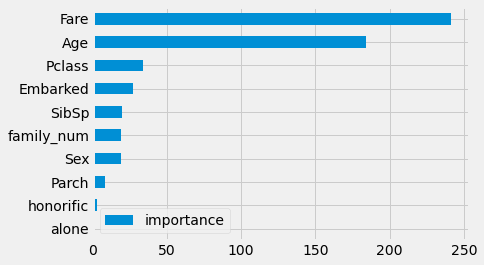

In [134]:
importance = pd.DataFrame(model_lgb.feature_importance(), index=X_train.columns, columns=["importance"]).sort_values(by="importance", ascending=True)
importance.plot.barh()

Fare, Age에 이어 Pclass 등이 중요한 변수로 파악되었다.이전에 시각화 한 자료와 일치하여, 어린아이들이 우선적으로 구조되었을 가능성이 있고, 상위클래스 고객이 우선적으로 구조되었을 가능성을 엿볼 수 있다.

## 검증 데이터로 예측 정확도 확인
#### 모델을 검증 데이터에 적용하기
이 모델을 검증 데이터에 적용해보자. `predict(예측하고 싶은 데이터)` 명령어로 예측을 실행한다.

predict()에 num_iteration 인수를 넣고, `모델명.best_iteration`이라고 지정하면 정확도가 가장 높을 때의 학습 모델을 사용하여 예측한다.

In [156]:
y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)

#### 예측 정확도 출력하기
예측 정확도를 출력해보자. 타이타닉 생존자 예측 경진대회의 평가 지표는 _정확도_ 이다. 정확도란, _모든 예측 항목 중 정확하게 예측한 항목의 비율_ 을 의미한다.

일단 정확도를 계산하는 라이브러리를 불러온다.

In [136]:
from sklearn.metrics import accuracy_score

accuracy_score(y_valid, np.round(y_pred))

0.8435754189944135

## 교차검증을 이용한 학습
다음으로 교차검증을 이용해보자. 여기서는 세 개로 분할하는 _3-fold 교차검증_ 을 한다.

In [137]:
folds = 3
kf = KFold(n_splits=folds)

In [138]:
models = []
for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]

    lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categories)
    lgb_eval = lgb.Dataset(X_valid, y_valid, categorical_feature=categories, reference=lgb_train)

    model_lgb = lgb.train(lgbm_params,
                          lgb_train,
                          valid_sets=lgb_eval,
                          num_boost_round=100,
                          early_stopping_rounds=20,
                          verbose_eval=10
                          )

y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
print(accuracy_score(y_valid, np.round(y_pred)))
models.append(model_lgb)

/Users/gello/.local/share/virtualenvs/Tytanic-0ZIX3wce/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/gello/.local/share/virtualenvs/Tytanic-0ZIX3wce/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/Users/gello/.local/share/virtualenvs/Tytanic-0ZIX3wce/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightG

[LightGBM] [Info] Number of positive: 236, number of negative: 358
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000722 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 206
[LightGBM] [Info] Number of data points in the train set: 594, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.397306 -> initscore=-0.416701
[LightGBM] [Info] Start training from score -0.416701
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

3-fold 교차 검증을 이용하여 모델 3개를 만들었다. 테스트 데이터에 대한 최종 정확도는 각 모델의 예측 정확도를 조합해서 산출하는데, 간단히 평균을 구하면 된다. 또는 더 높은 정확도가 나오도록 계속해서 가중치를 조절할 수도 있을 것이다.

#### 테스트 데이터의 예측 결과 산출하기

In [139]:
preds = []

for model in models:
    pred =  model.predict(test_X)
    preds.append(pred)

#### 예측결과의 평균 구하기


In [164]:
preds_array = np.array(preds)
preds_mean = np.mean(preds_array, axis=0)

위 값은 각각의 사람마다 예측 생존 확률을 나타낸 배열이다. 이제 생존이나 사망을 예측하고자 결과를 0(사망)이나 1(생존)로 변환해 보자.

여기서는 0.5보다 큰 경우 1(생존)로 예측해보겠다.

In [141]:
preds_int = (preds_mean > 0.5).astype(int)

#### submission 파일 생성하기
submission 파일을 생성해서 결과를 제출해보자.

In [142]:
submission["Survived"] = preds_int
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


#### 결과를 CSV로 저장하기

In [143]:
submission.to_csv("./submit/titanic_submit01.csv", index=False) #인덱스 번호 불필요